In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
file1 = pd.read_csv("Task1.csv")
file1.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


Data Preprocessing

In [108]:
file1.drop(['car'],inplace=True,axis=1)
file1.drop(['maritalStatus'],inplace=True,axis=1)
file1.drop(['has_children'],inplace=True,axis=1)
file1.drop(['RestaurantLessThan20'],inplace=True,axis=1)
file1.drop(['temperature'],inplace=True,axis=1)
file1.drop(['time'],inplace=True,axis=1)
file1.drop(['expiration'],inplace=True,axis=1)
file1.drop(['gender'],inplace=True,axis=1)
file1.drop(['age'],inplace=True,axis=1)
file1.drop(['education'],inplace=True,axis=1)
file1.drop(['occupation'],inplace=True,axis=1)

file1.columns

Index(['destination', 'passanger', 'weather', 'coupon', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [109]:

file1.dropna(inplace=True)
file1.drop_duplicates(inplace=True)
file1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10546 entries, 22 to 12683
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   destination        10546 non-null  object
 1   passanger          10546 non-null  object
 2   weather            10546 non-null  object
 3   coupon             10546 non-null  object
 4   income             10546 non-null  object
 5   Bar                10546 non-null  object
 6   CoffeeHouse        10546 non-null  object
 7   CarryAway          10546 non-null  object
 8   Restaurant20To50   10546 non-null  object
 9   toCoupon_GEQ5min   10546 non-null  int64 
 10  toCoupon_GEQ15min  10546 non-null  int64 
 11  toCoupon_GEQ25min  10546 non-null  int64 
 12  direction_same     10546 non-null  int64 
 13  direction_opp      10546 non-null  int64 
 14  Y                  10546 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 1.3+ MB


In [110]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Step 1: Identify categorical columns to encode
cat_cols = ['coupon','CoffeeHouse','Restaurant20To50', 'CarryAway','Bar','destination','passanger','weather','income']

# Step 2: Create dataframe of categorical variables
cat_df = file1[cat_cols]

# Step 3: One-hot encode the categorical variables
enc = OneHotEncoder(handle_unknown='ignore')
onehot_encoded = enc.fit_transform(cat_df).toarray()

# Step 4: Convert one-hot encoded matrix to dataframe
onehot_df = pd.DataFrame(onehot_encoded, columns=enc.get_feature_names(cat_cols))

# Step 5: Concatenate the original dataframe with the one-hot encoded dataframe
new_df = pd.concat([file1.drop(cat_cols, axis=1), onehot_df], axis=1)

new_df.head()

c:\Users\Ms Links\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),...,weather_Sunny,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500
22,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
new_df.info()
new_df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12408 entries, 22 to 10515
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   toCoupon_GEQ5min              10546 non-null  float64
 1   toCoupon_GEQ15min             10546 non-null  float64
 2   toCoupon_GEQ25min             10546 non-null  float64
 3   direction_same                10546 non-null  float64
 4   direction_opp                 10546 non-null  float64
 5   Y                             10546 non-null  float64
 6   coupon_Bar                    10546 non-null  float64
 7   coupon_Carry out & Take away  10546 non-null  float64
 8   coupon_Coffee House           10546 non-null  float64
 9   coupon_Restaurant(20-50)      10546 non-null  float64
 10  coupon_Restaurant(<20)        10546 non-null  float64
 11  CoffeeHouse_1~3               10546 non-null  float64
 12  CoffeeHouse_4~8               10546 non-null  float64
 13  

In [112]:
# now apply decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = new_df.drop(['Y'],axis=1)
y = new_df['Y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model with 100 trees
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.538860103626943

In [113]:
from sklearn.model_selection import GridSearchCV

X = new_df.drop(['Y'],axis=1)
y = new_df['Y']

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# Define hyperparameters to tune
params = {'max_depth': [3, 4, 5, 6, 7], 'min_samples_split': [2, 5, 10]}

# Use k-fold cross-validation to find the best hyperparameters
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid.fit(X_trainval, y_trainval)

# Extract the best hyperparameters and retrain the model on the combined training and validation set
best_params = grid.best_params_
model = DecisionTreeClassifier(**best_params, random_state=42)
model.fit(X_trainval, y_trainval)

# Evaluate the performance of the final model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


Test accuracy: 0.5860679332181923


In [114]:
# Metrics for the training set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_error = 1 - train_accuracy
train_sensitivity = train_confusion[0,0]/(train_confusion[0,0]+train_confusion[0,1])
train_specificity = train_confusion[1,1]/(train_confusion[1,0]+train_confusion[1,1])

# Metrics for the validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_confusion = confusion_matrix(y_val, y_val_pred)
val_error = 1 - val_accuracy
val_sensitivity = val_confusion[0,0]/(val_confusion[0,0]+val_confusion[0,1])
val_specificity = val_confusion[1,1]/(val_confusion[1,0]+val_confusion[1,1])

# Metrics for the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_error = 1 - test_accuracy
test_sensitivity = test_confusion[0,0]/(test_confusion[0,0]+test_confusion[0,1])
test_specificity = test_confusion[1,1]/(test_confusion[1,0]+test_confusion[1,1])


In [115]:
#print the metrics
print('Training Accuracy:', train_accuracy)
print('Training Precision:', train_precision)
print('Training Recall:', train_recall)
print('Training F1:', train_f1)
print('Training Confusion Matrix:', train_confusion)
print('Training Error:', train_error)
print('Training Sensitivity:', train_sensitivity)
print('Training Specificity:', train_specificity)

Training Accuracy: 0.5754903725031492
Training Precision: 0.5685137027405481
Training Recall: 0.9336399474375822
Training F1: 0.7067014795474326
Training Confusion Matrix: [[ 356 2157]
 [ 202 2842]]
Training Error: 0.42450962749685084
Training Sensitivity: 0.1416633505769996
Training Specificity: 0.9336399474375822


In [116]:
#for validation set
print('Validation Accuracy:', val_accuracy)
print('Validation Precision:', val_precision)
print('Validation Recall:', val_recall)
print('Validation F1:', val_f1)
print('Validation Confusion Matrix:', val_confusion)
print('Validation Error:', val_error)
print('Validation Sensitivity:', val_sensitivity)
print('Validation Specificity:', val_specificity)


Validation Accuracy: 0.5741007194244604
Validation Precision: 0.5795819935691319
Validation Recall: 0.9126582278481012
Validation F1: 0.7089478859390365
Validation Confusion Matrix: [[ 77 523]
 [ 69 721]]
Validation Error: 0.4258992805755396
Validation Sensitivity: 0.12833333333333333
Validation Specificity: 0.9126582278481012


In [117]:
#for test set
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test F1:', test_f1)
print('Test Confusion Matrix:', test_confusion)
print('Test Error:', test_error)
print('Test Sensitivity:', test_sensitivity)
print('Test Specificity:', test_specificity)


Test Accuracy: 0.5860679332181923
Test Precision: 0.580064308681672
Test Recall: 0.9318181818181818
Test F1: 0.7150217994451051
Test Confusion Matrix: [[116 653]
 [ 66 902]]
Test Error: 0.4139320667818077
Test Sensitivity: 0.1508452535760728
Test Specificity: 0.9318181818181818


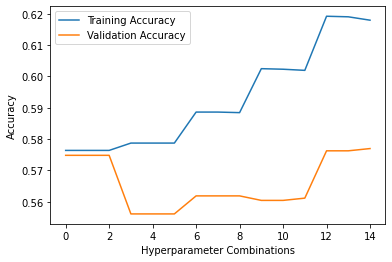

In [118]:
import matplotlib.pyplot as plt

# Fit the model on the training set and evaluate on the training and validation sets
train_accs = []
val_accs = []
for depth in [3, 4, 5, 6, 7]:
    for split in [2, 5, 10]:
        model = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, random_state=42)
        model.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, model.predict(X_train))
        val_acc = accuracy_score(y_val, model.predict(X_val))
        train_accs.append(train_acc)
        val_accs.append(val_acc)

# Plot the accuracy curves
plt.plot(range(len(train_accs)), train_accs, label='Training Accuracy')
plt.plot(range(len(val_accs)), val_accs, label='Validation Accuracy')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
